# The Relationship Between Obesity and Internet Use

#### Gizem Kaya, Necdet Alperen Özil



Determination and interpretation of the relationship between the number of obese people received from 200 countries between 1975 and 2016 and the number of people using the internet. We expect the relationship between these two features to be a linearly increasing correlation. Because we think that using the internet and technology together reduces the need for people to move. In this project, we investigated the emergence of the lack of movement, the main cause of obesity, with the spread of the internet and technology.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

   The growth and development speed of the world is accelerating day by day. This growth benefits us in terms of technological and increasing the quality and length of human life. 

   > For example, psychological counseling with internet connection can be very useful for an individual who is impossible to leave home. 
   
   However, although we think that the solution of many problems is effective, we should not forget that sometimes there may be side effects. The fact that the Internet brings distant things closer to us has made it easier for people not only in the field of health but also in many business areas. But, this not only facilitated the achievement of hard-to-achieve things, but also reduced the effort that people exerted to achieve them. 
   >For instance, people working remotely among countries can earn money without ever leaving their homes. Or when we want to see a friend, we can see his face without going to him or her.
   
   These are the privileges that come to our feet thanks to the internet, without any long or tiring effort. But we know that acting is inherent in nature, benefiting human health and prolonging life by reducing heart conditions. Obesity is one of the main diseases that have been on the agenda for the last 10 years and emerged as a result of inactivity. We think obesity is caused by immobility, poor quality meals and eating too much food. We know that the use of the Internet completely fills our free time with the principles of social media and remote work. So much so that sometimes we don't have enough time to eat or eat. So we order fast food 'online' to meet our food needs. Although these fast food foods look great, we get hungry again and want to eat again because they are of poor quality. Thus, we both eat a lot and eat high-carb meals on the effect of the internet on us. Organizing eating habits in this way may cause obesity. 
   
   In the light of these thoughts, we tried to show the connection between countries by comparing the number of citizens who are obese with internet usage by years.

## Data Understanding<a class="anchor" id="data_understanding"></a>

We will use 3 different datasets in this project. The first is Internet Users, the second is Population, and the third is Obesity datasets. 



* *Internet Users*, that we found at The World Bank, includes the total number of people using the internet in 264 countries, with a separate representation for each year from 1960 to 2019. If we look at the data, we see that most of the data in the Internet Users dataset earlier than 2000 is missing. This deficiency also caught our attention when searching for a dataset, but it seemed reasonable that the Internet was not used at that time. 

    For our project, the number of internet users registered in this dataset should be proportional to the population for each country. We will also calculate the percentage of Internet users with the number of people we receive from the Internet Users data set with the dataset that shows the population of the countries with our Population dataset.



* *Population dataset*, that we found at The World Bank, contains the population of in 264 countries between 1960 and 2019. If we look at the Popolation dataset, we can see the appearance of the Population and the Internet Users dataset are similar. Because the sources from which datasets are provided are the same. This means we can easily make operations on them. Also, The Population dataset will be used to find the ratio of Internet users in a country to the population of that country.



* *Obesity* dataset, that we found at Global Health Observatory Data Repository, shows the ratio of obese population of 195 countries of all years from 2016 to 1975 to real population by making gender discrimination in individuals over the age of 18. Since our other datasets are not seperated by gender, we will only use the column that applies to both sexes out of 3 columns that are male, female and both sexes. However we don't have a  The data type of this dataset is percentage of defined population with a body mass index (BMI) of 30 kg/m2 or higher. And this data is calculated with Worldwide trends in body-mass index, underweight, overweight, and obesity from 1975 to 2016: a pooled analysis of 2416 population-based measurement studies with 128.9 million participants.

# Data Preparation<a class="anchor" id="data_preparation"></a>

Loading the necessary libraries

In [127]:
# for creating dataframes

import pandas as pd

# for madelling and evaluation

import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 


# magic funclions

%matplotlib inline

### Reading .csv files of data sets

When we are reading the Internet_Users.csv and Population.csv files, we skipped first 4 row. Because the begining of the file has 4 description rows.

In [128]:
# to be able to set the index column as Country Name column, we used index_col as zero.

Internet_Users = pd.read_csv("Internet_Users.csv", skiprows=4, index_col=0)
Internet_Users.head(4)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,74.000000,78.9,83.78,88.661227,93.542454,97.170000,NaN,NaN,NaN
Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.454545,5.9,7.00,8.260000,11.200000,13.500000,NaN,NaN,NaN
Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.1,6.500000,8.9,21.40,12.400000,13.000000,14.339079,NaN,NaN,NaN
Albania,ALB,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.0,54.655959,57.2,60.10,63.252933,66.363445,71.847041,NaN,NaN,NaN


In [129]:
Population = pd.read_csv("Population.csv", skiprows=4, index_col=0)
Population.head(4)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN


In [130]:
Obesity = pd.read_csv("Obesity.csv", index_col=0)
Obesity.head(4)

,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],4.7 [2.9-6.9],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]


### Feature Selection

When examining the dataframe to be able to make feature selection, we can see 'Country Code', 'Indicator Name',  'Indicator Code' columns are not relative to our study. So these columns should be discarded. 

In [131]:
Internet_Users.drop([ 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace = True) 

# axis 1 represents we drop the columns not rows.

As we did on Internet_Users dataframe, when examining the Population dataframe to be able to make feature selection, we can see 'Country Code', 'Indicator Name',  'Indicator Code' columns are not relative to our study. So these columns should be discarded. 

In [132]:
Population.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace = True) 

# axis 1 represents we drop the columns not rows.

Looking at the data we have, we can say the following:

Our Internet_Users and Population data set contains data from all years from 1960 to 2019. However, our Obesity data set contains data from 1975 to 2016. Therefore most of the data for 2019 and 2018 are missing, there is no harm in deleting these columns. Also, since we need to continue our work on the years common to all three data sets, we delete the years outside their intersection from the Internet_Users and Population datasets.

In [133]:
columns_should_dropped_list = ['1960','1961','1962','1963','1964','1965',
                               '1966','1967','1968','1969','1970','1971',
                               '1972','1973','1973','1974','2017','2018','2019','Unnamed: 64']



Internet_Users.drop(columns_should_dropped_list, axis=1, inplace = True)
Population.drop(columns_should_dropped_list, axis=1, inplace = True)

Internet_Users.head()


,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.900000,52.00,58.00,62.0,69.0,74.000000,78.9,83.78,88.661227,93.542454
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.00,8.260000,11.200000
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.700000,1.90,2.30,2.8,3.1,6.500000,8.9,21.40,12.400000,13.000000
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.10,63.252933,66.363445
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.90,96.910000,97.930637


In [134]:
Obesity.head(4)

,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],4.7 [2.9-6.9],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]


As we can see, there is no valuable data in the first 3 lines of the dataframe. So, the first step is the preparation of Obesity dataframe is getting rid of the first 3 rows.

In [135]:
Obesity = Obesity.iloc[3:, :]

# set index column's name as the other dataframe's index names.
Obesity.index.name = 'Country Name'
Obesity.head(2)

,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],4.7 [2.9-6.9],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],19.9 [15.7-24.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]


If we look at the columns, we see the numbers after the dot next to the years. These numbers are for sex discrimination.
The years which has not any number next to them, represent both sexes. If the year has .1, then this means the columns has data of men. If the year has .2, then this means the columns has data of women. 

We got rid of the details given in square brackets to see the data more clearly.

In [136]:
for column in Obesity:
    Obesity[column] = Obesity[column].astype(str).str[:4].astype(np.str)
    
Obesity.head(2)

,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.5,3.2,7.6,5.2,3.0,7.3,4.9,2.8,7.0,4.7,...,0.9,0.6,0.2,0.9,0.5,0.2,0.8,0.5,0.2,0.8
Albania,21.7,21.6,21.8,21.1,20.9,21.3,20.5,20.2,20.8,19.9,...,9.1,6.8,4.8,8.9,6.7,4.6,8.8,6.5,4.4,8.6


In [137]:
Obesity.describe(include = 'all')

,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
count,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
unique,144,137,153,153,140,151,144,135,152,139,...,127,103,89,115,111,88,117,104,84,115
top,8.6,4.0,25.4,No d,No d,No d,19.2,4.1,No d,19.5,...,1.7,0.6,0.4,1.6,0.9,0.2,1.5,0.9,0.2,1.0
freq,4,4,4,4,4,4,4,5,4,4,...,5,8,15,6,9,18,7,7,18,7


As you can see in the table, some values are written as 'No d'. This string means 'No data', that is, the missing data. Although we think that these missing data should be filled in terms of the integrity of our project, when we open and look at the data, we see that all the missing data are in 'South Sudan', 'Sudan', 'San Marino', 'Monaco'.

In [138]:
Obesity.loc[['South Sudan', 'Sudan', 'San Marino', 'Monaco']]

,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
Country Name,,,,,,,,,,,,,,,,,,,,,
South Sudan,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d,...,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d
Sudan,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d,...,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d
San Marino,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d,...,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d
Monaco,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d,...,No d,No d,No d,No d,No d,No d,No d,No d,No d,No d


So we removed these countries from our dataset.

In [139]:
Obesity.drop('South Sudan', axis = 0, inplace = True)
Obesity.drop('Sudan', axis = 0, inplace = True)
Obesity.drop('San Marino', axis = 0, inplace = True)
Obesity.drop('Monaco', axis = 0, inplace = True)

After these operations and converting to our data types into numeric values, let's check the describe table.

In [140]:
dataframes = [Internet_Users, Population, Obesity]

for dataframe in dataframes:
    
    for column in dataframe:
        
        pd.to_numeric(dataframe[column])
    
    
Obesity.describe()

,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
count,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
unique,143,136,152,152,139,150,143,134,151,138,...,126,102,88,114,110,87,116,103,83,114
top,8.6,18.9,25.4,24.1,4.3,21.3,21.6,4.1,20.5,19.5,...,1.7,0.6,0.4,1.6,0.9,0.2,1.5,0.5,0.2,1.4
freq,4,4,4,3,4,3,4,5,3,4,...,5,8,15,6,9,18,7,7,18,7


According to the decribe table we got last, there are many unique values in our data set, that is, there are few repetitive values. This expresses the detail of the data we use in our work. Because the fact that most of our data is the same means that the data is reached as a result of generalization or simplification.

As we mentioned before, we need to drop the columns ending with .1 and .2 since the gender gap has no relation with the data in our project.

In [141]:

for column in Obesity:
    
    # if the penultimate character is '.'
    if Obesity[column].name[-2] == '.':
        # drop this column
        Obesity.drop(column, axis = 1, inplace = True)

      

To compare the Obesity dataframe to the other two dataframes, we need to reverse the order of the columns.

In [142]:
Obesity = Obesity.iloc[:, ::-1]

In [143]:
Internet_Users.head()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.900000,52.00,58.00,62.0,69.0,74.000000,78.9,83.78,88.661227,93.542454
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.00,8.260000,11.200000
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.700000,1.90,2.30,2.8,3.1,6.500000,8.9,21.40,12.400000,13.000000
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.10,63.252933,66.363445
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.90,96.910000,97.930637


In [144]:
Population.head()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,...,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0
Afghanistan,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,...,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0
Angola,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,...,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0
Albania,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
Andorra,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,...,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0


In [145]:
Obesity.head()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.8,0.8,0.9,...,3.4,3.6,3.8,4.0,4.2,4.4,4.7,4.9,5.2,5.5
Albania,6.5,6.7,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.3,...,16.5,17.0,17.6,18.2,18.8,19.3,19.9,20.5,21.1,21.7
Algeria,6.9,7.2,7.4,7.7,8.0,8.3,8.6,9.0,9.4,9.7,...,21.4,22.0,22.7,23.3,24.0,24.7,25.3,26.0,26.7,27.4
Andorra,12.9,13.5,14.0,14.5,15.0,15.5,16.0,16.5,16.9,17.4,...,23.8,24.0,24.2,24.4,24.6,24.8,25.0,25.2,25.4,25.6
Angola,0.8,0.9,0.9,1.0,1.1,1.1,1.2,1.3,1.3,1.4,...,5.3,5.6,5.9,6.2,6.5,6.8,7.1,7.5,7.9,8.2


After all these features determination operations, we made all the features of the 3 dataframes the same.

### Finding The Common Countries

At the Obesity data set we have less country than Internet_Users and Population data set. Since a common study can be carried out on the countries they intersect, we must first find the countries they intersect, and then remove the countries outside these countries from all datasets.

In [146]:
intersection = np.intersect1d(Internet_Users.index, Obesity.index)
Internet_Users = Internet_Users.loc[intersection]



After the column reduction process, it is seen that Internet_Users did not include all the countries included in the Obesity dataframe. Because the number of rows remained 162 only when there were crossing countries, and this number is less than the number of rows in the Obesity data set, which is 195.

In this case, we need to extract countries that do not intersect not only from Internet_Users and Population but also from the Obesity dataframe.

In [147]:
# we define the intersection above

Population = Population.loc[intersection]

In [148]:
# we define the intersection above

Obesity = Obesity.loc[intersection]

In [149]:
print('Shape of Internet_Users:', Internet_Users.shape)
print('Shape of Population:', Population.shape)
print('Shape of Obesity:', Obesity.shape)

('Shape of Internet_Users:', (162, 42))
('Shape of Population:', (162, 42))
('Shape of Obesity:', (162, 42))


As can be seen from the output above, we can now find 3 different data from the same countries in the dataframes for the same years.

### Missing Values

Let's look at the **Internet_Users**'s missing value counts of countries that have less than 20 entries.

In [150]:
row_names = []
for index, row in Internet_Users.iterrows():
    if row.count() < 20:
        row_names.append(row.name)
        print(row.name , row.count())
        

('Afghanistan', 17)
('Bhutan', 19)
('Guyana', 17)
('Iraq', 17)
('Liberia', 19)
('Libya', 18)
('Mongolia', 19)
('Montenegro', 13)
('Myanmar', 18)
('Nauru', 3)
('Palau', 4)
('Serbia', 13)
('Tajikistan', 19)
('Timor-Leste', 14)
('Turkmenistan', 19)
('Tuvalu', 12)


Have a look at the rows.

In [151]:
Internet_Users.loc[row_names,:]

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900000,1.84,3.55,4.00,5.000000,5.454545,5.900000,7.000000,8.260000,11.200000
Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.920000,6.55,7.17,13.60,14.400000,15.600000,22.400000,30.300000,39.800000,41.772645
Guyana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.800000,18.20,23.90,29.90,30.000000,30.500000,31.000000,32.000000,34.000000,35.660000
Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.930000,1.00,1.06,2.50,5.000000,7.100000,9.200000,13.210000,58.000000,21.230000
Liberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.551377,0.53,2.00,2.30,2.500000,2.600000,3.200000,5.410000,33.000000,7.319106
Libya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.721999,9.00,10.80,14.00,14.000000,NaN,16.500000,17.760000,19.016080,20.272160
Mongolia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,9.80,10.00,10.20,12.499991,16.400000,17.699984,19.942447,22.500004,22.265770
Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.800000,32.90,35.10,37.50,35.611541,56.838783,60.310000,61.000000,68.119581,69.881647
Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.217128,0.22,0.22,0.25,0.980000,4.000000,8.000000,11.520000,21.725834,25.073304


As can be seen from this output, the internet was not used in Montenegro before 2003. There is no need to remove this country from our dataframes, as the internet usage data is in all years since 2003.

When we look at the countries with less than 20 entries in order, we see that the data of only two countries are entered randomly by years, Nauru and Palau. 

In this case we need to exclude these two countries from all our data sets.

In [152]:
dataframes = [Internet_Users, Population, Obesity]

for dataframe in dataframes:

    dataframe.drop('Nauru', axis = 0, inplace = True)
    dataframe.drop('Palau', axis = 0, inplace = True)

Let's look at the **Population**'s missing value counts and check if there is a year missing from 42 years.

In [153]:
there_is_missing_value = False
row_names = []

for index, row in Population.iterrows():
    if row.count() < 42:
        there_is_missing_value = True
        row_names.append(row.name)
        print(row.name, row.count())
        
if there_is_missing_value == False:
    print('There is no missing value!')


('Eritrea', 37)
('Kuwait', 39)
('Serbia', 27)


Have a look at these rows.

In [154]:
Population.loc[row_names,:]

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Eritrea,1505439.0,1547975.0,1591620.0,1636769.0,1683939.0,1733416.0,1784561.0,1836823.0,1890558.0,1946305.0,...,2996536.0,3062779.0,3119920.0,3170435.0,3213972.0,NaN,NaN,NaN,NaN,NaN
Kuwait,1021720.0,1085861.0,1153583.0,1224067.0,1296081.0,1368677.0,1439331.0,1507645.0,1576968.0,1652150.0,...,2504019.0,2656009.0,2821045.0,2991884.0,3168060.0,3348853.0,3526378.0,3690942.0,3835591.0,3956873.0
Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7381579.0,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0


To be able to make a decision about missing value handling on Popolation dataframe, we should gather more informationfrom these 3 countries.

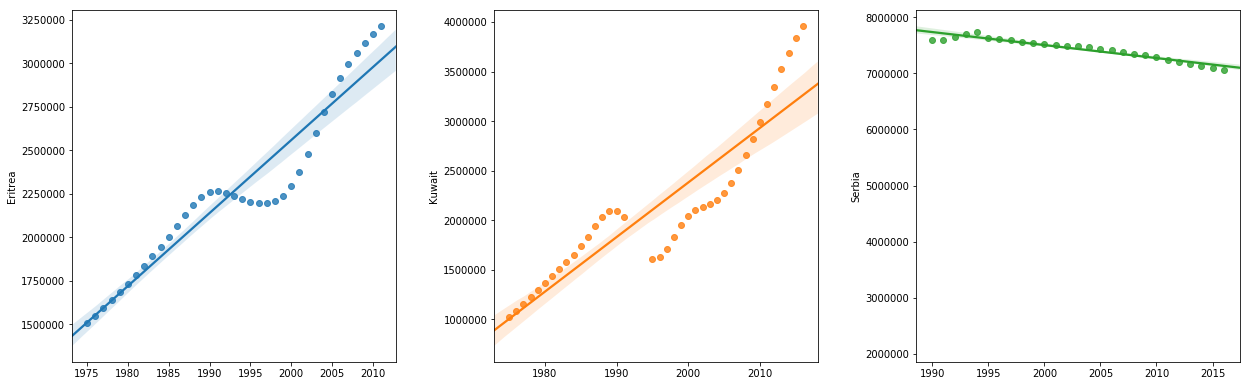

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
years = np.array(list(range(1975,2017)))

Eritrea = Population.loc[row_names[0],:]
Kuwait = Population.loc[row_names[1],:]
Serbia = Population.loc[row_names[2],:]

sns.regplot(x = years, y = Eritrea, data = Population, marker='o', ax=axes[0])
sns.regplot(x = years, y = Kuwait, data = Population, marker='o', ax=axes[1])
sns.regplot(x = years, y = Serbia, data = Population, marker='o', ax=axes[2])

fig.tight_layout(pad=3.0)

plt.show()


Based on the graph of the Eritrea series, we decided to interpolate on a segment basis with a piecewise polynomial interpolation to fill the missing values.

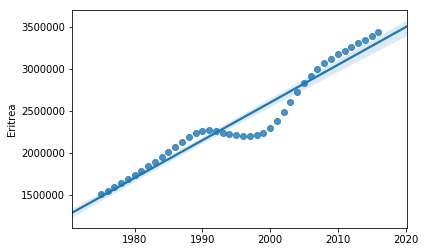

In [156]:

Eritrea.index = pd.to_numeric(Eritrea.index)

Eritrea.interpolate(method = 'spline', order = 1, limit_direction = 'forward', axis = 0, inplace = True)

sns.regplot(x = years, y = Eritrea, data = Population, marker='o')

plt.show()

Based on the graph of the Eritrea series, we should use polynomial interpolation to fill the missing values.

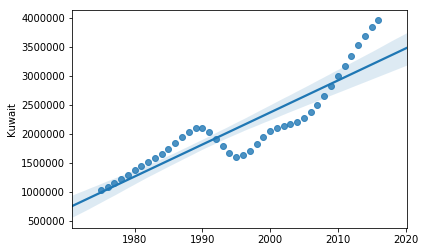

In [157]:
Kuwait.index = pd.to_numeric(Eritrea.index)

Kuwait.interpolate(method = 'polynomial', order = 3, limit_direction = 'forward', axis = 0, inplace = True)

sns.regplot(x = years, y = Kuwait, data = Population, marker='o')

plt.show()

Since serbia was founded in 2006, we fill in the population information before 2006 with 0.

Let's look at the **Obesity**'s missing value counts and check if there is a year missing from 42 years.

In [158]:
there_is_missing_value = False

for index, row in Obesity.iterrows():
    if row.count() < 42:
        there_is_missing_value = True
        print(row.name, row.count())
        
if there_is_missing_value == False:
    print('There is no missing value!')

There is no missing value!


So, we can see there is no missing value in Obesity dataframe.

If we look at the parts of the Internet users with the NaN values in the dataset, we understand that the internet was not used in those years. So we can replace these NaN values with zero values. 

Since we filled or dropped in the missing values that should be filled with interpolation methods or dropped in all dataframes, we can fill the remaining missing values with zero.

In [159]:
for dataframe in dataframes:

    dataframe = dataframe.fillna(0)

## Modeling<a class="anchor" id="modeling"></a>

In [ ]:
# Which model will be used? Why? What parameters?

Simple linear regression model will be used. Because our data is growing linearly. Parameters are population, internet users, obesity. If we can confirm population and internet users are linearly dependent. If we can show internet users and obesity are linearly dependent. At the end we can say internet usage and obesity of population is related with each other.

In [163]:
lm=LinearRegression()

In [178]:
X=np.array(Internet_Users[['2016']]).reshape((-1, 1))

In [179]:
Y=np.array(Obesity[['2016']])

In [182]:
#at above, when I try to change 2016 to another date there was no problem. But when I want to use all of the dataset it gives error.

In [180]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Evaluation<a class="anchor" id="evaluation"></a>

In [181]:
r_sq = lm.score(X, Y)
print('coefficient of determination:', r_sq)

('coefficient of determination:', 0.21297483771837833)


In [183]:
#I used this website to learn how to evaluate

Evaluate your model. Provide results, tables, charts, etc.

## References<a class="anchor" id="references"></a>

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>